In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(4)

In [2]:
stock_data = yf.download('AAPL','2012-01-03','2020-03-13')
raw_data = pd.DataFrame(stock_data, columns=['Close'])
raw_data = raw_data.reset_index()
raw_data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Close
0,2012-01-03,58.747143
1,2012-01-04,59.062859
2,2012-01-05,59.718571
3,2012-01-06,60.342857
4,2012-01-09,60.247143


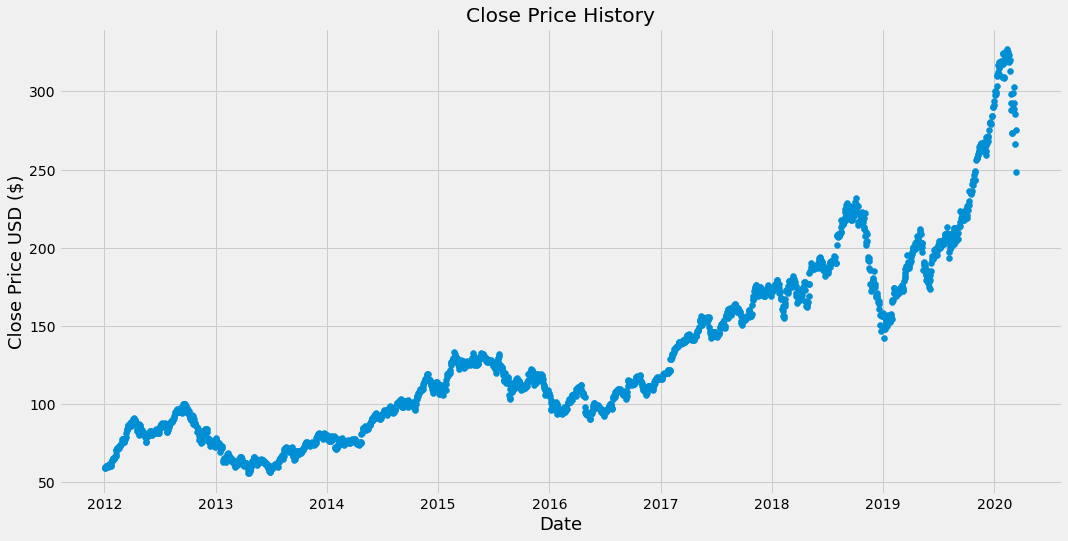

In [3]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.scatter(raw_data['Date'], raw_data['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
train, test = train_test_split(raw_data, test_size=0.2)

x_train = np.array(train.index).reshape(-1, 1)
y_train = train['Close']

x_test = np.array(test.index).reshape(-1, 1)
y_test = test['Close']

x_train.shape

(1648, 1)

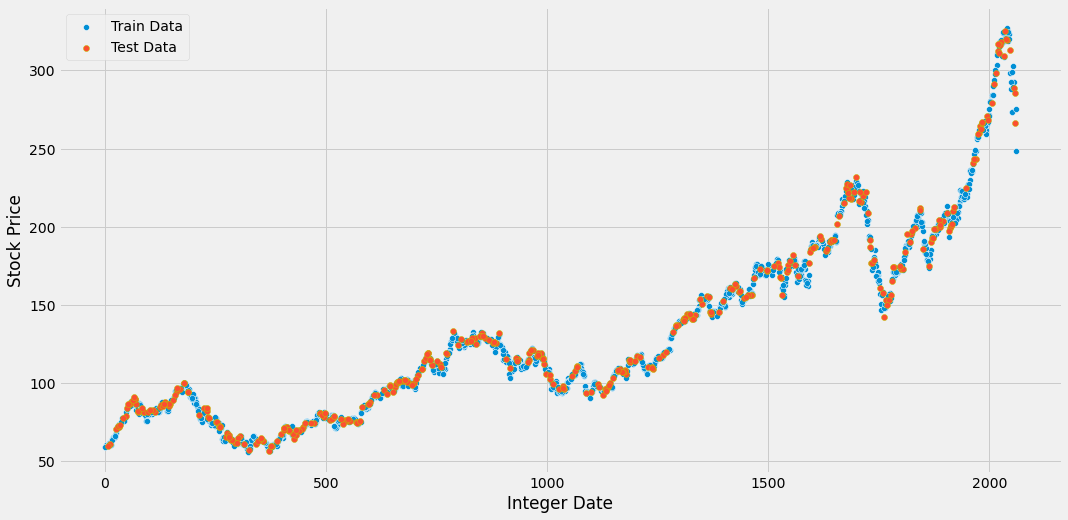

In [5]:
plt.figure(1, figsize=(16,8))
plt.scatter(x_train, y_train, edgecolor='w', label='Train Data')
plt.scatter(x_test, y_test, edgecolor='y', label='Test Data')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [6]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

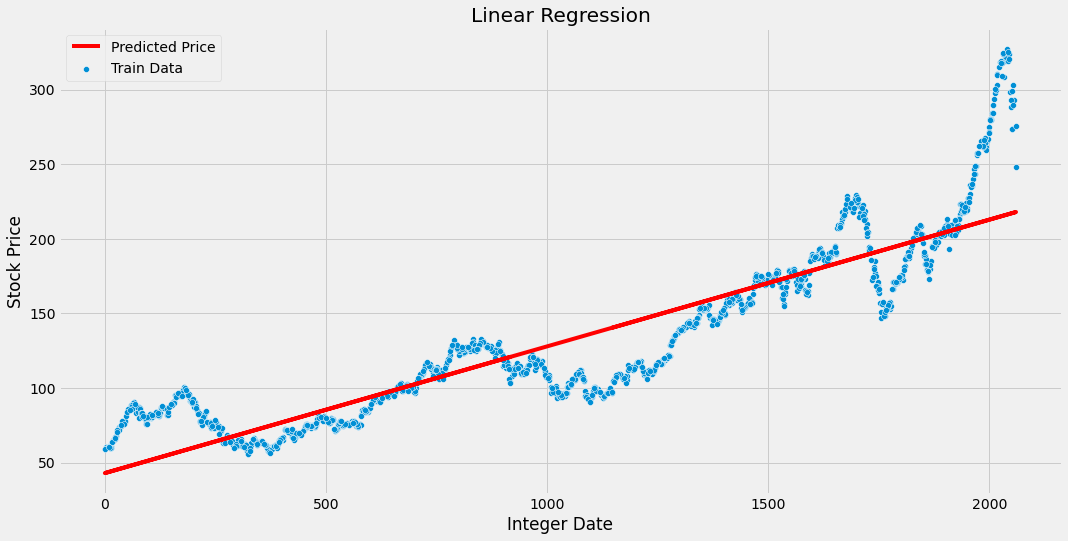

In [7]:
plt.figure(1, figsize=(16,8))
plt.title('Linear Regression')
plt.scatter(x_train, y_train, edgecolor='w', label='Train Data')
plt.plot(x_train, model.predict(x_train), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [8]:
y_pred = model.predict(x_test)

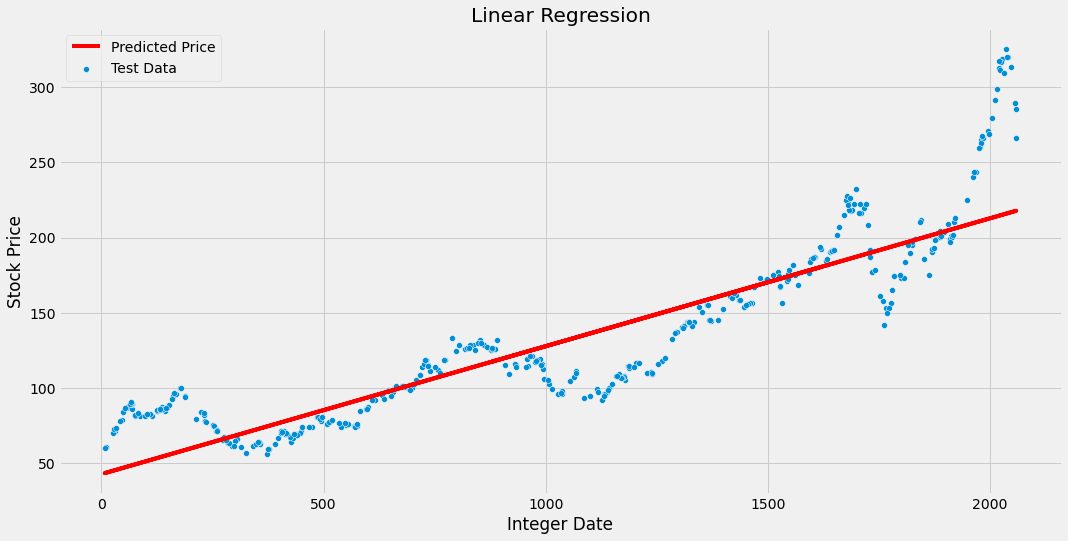

In [9]:
plt.figure(1, figsize=(16,8))
plt.title('Linear Regression')
plt.scatter(x_test, y_test, edgecolor='w', label='Test Data')
plt.plot(x_test, model.predict(x_test), color='r', label='Predicted Price')
plt.xlabel('Integer Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()